# Project-1 : Research Desgin Write-Up

In [2]:
import warnings
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Importing admission.csv data in to dataframe
admit_df = pd.read_csv('admissions.csv')
admit_df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


From this dataset we have four(4) features or columns. We can differentiate in to two groups. The First group is independent variables the second group is dependent variables. 
In this case **admit** is dependent feature, while **gre**, **gpa**, **prestige** are independent features.

First we can look at the characteristics of the features of the admissions dataset.

In [68]:
admit_df.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

In [69]:
admit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [70]:
admit_df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [71]:
admit_df.kurtosis()

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

In [72]:
admit_df.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

(array([ 273.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  127.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

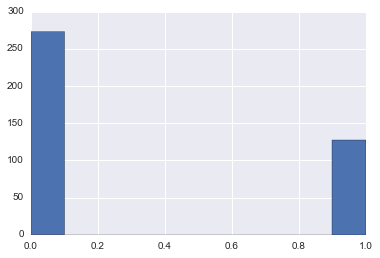

In [73]:
plt.hist(admit_df.admit)

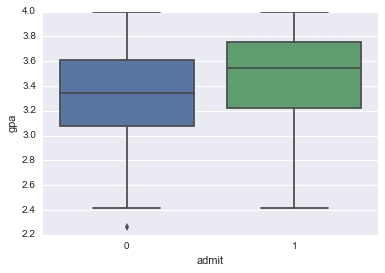

In [76]:
sns.boxplot(data = admit_df, x='admit', y='gpa')
sns.boxplot(data = admit_df, x='admit', y='gre')

In [14]:
admit_df[['gre', 'gpa']].corr()

,gre,gpa
gre,1.000000,0.382408
gpa,0.382408,1.000000


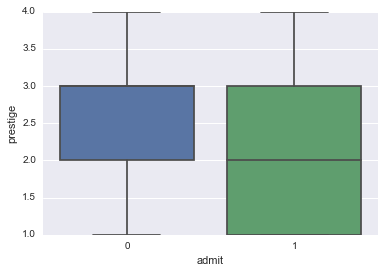

In [78]:
sns.boxplot(data = admit_df, x='admit', y='prestige')

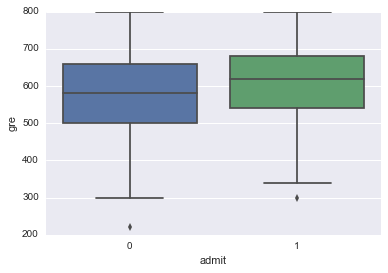

In [77]:
sns.boxplot(data = admit_df, x='admit', y='gre')

In [9]:
print pd.crosstab?

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   97   93   55
1          33   53   28   12


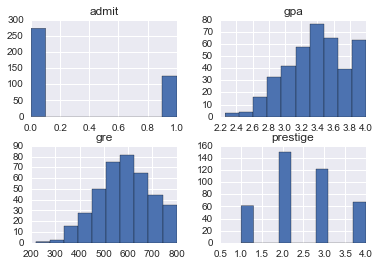

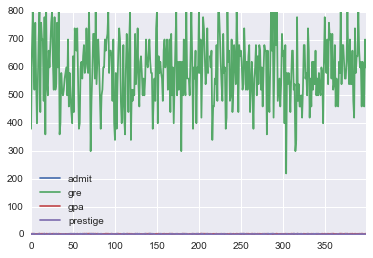

In [79]:
print pd.crosstab(admit_df.admit, admit_df.prestige, rownames=['admit'])
admit_df.hist()
admit_df.plot()

In [80]:
dummy_ranks = pd.get_dummies(admit_df.prestige, prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0           0.0           0.0           1.0           0.0
1           0.0           0.0           1.0           0.0
2           1.0           0.0           0.0           0.0
3           0.0           0.0           0.0           1.0
4           0.0           0.0           0.0           1.0


In [102]:
# create clean dataframe
cols_to_keep = ['admit', 'gre', 'gpa']
data_df = admit_df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data_df.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,1.0,0.0
1,1,660.0,3.67,0.0,1.0,0.0
2,1,800.0,4.00,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0


In [103]:
data_df = data.dropna()
data_df.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,1.0,0.0
1,1,660.0,3.67,0.0,1.0,0.0
2,1,800.0,4.00,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0


In [104]:
admit_df.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,1.0,0.0
1,1,660.0,3.67,0.0,1.0,0.0
2,1,800.0,4.00,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0


In [44]:
gb_admit = admit_df.groupby(['prestige'])['admit'].count()
gb_admit

prestige
1.0     61
2.0    148
3.0    121
4.0     67
Name: admit, dtype: int64

In [108]:
admit_df.groupby(['admit']).count()


,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
admit,,,,,
0,271,271,271,271,271
1,126,126,126,126,126


In [38]:
admit_df.gre.unique()

array([ 380.,  660.,  800.,  640.,  520.,  760.,  560.,  400.,  540.,
        700.,  440.,  480.,  780.,  360.,  500.,  600.,  680.,  620.,
        580.,  460.,  740.,  300.,  720.,  340.,  420.,  220.])

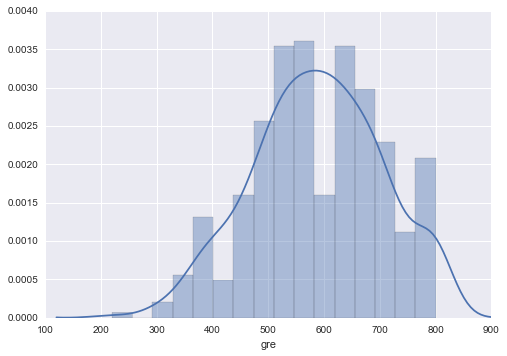

In [39]:
sns.distplot(admit_df['gre'])

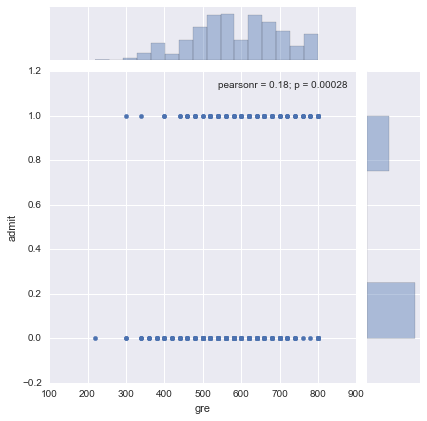

In [41]:
sns.jointplot(admit_df.gre, admit_df.admit)

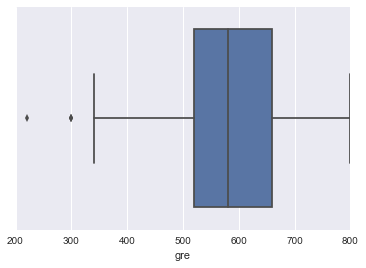

In [106]:
sns.boxplot(admit_df.gre)

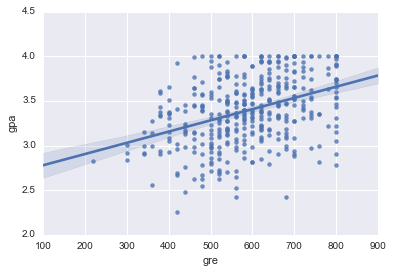

In [85]:
sns.regplot(admit_df.gre, admit_df.gpa)

In [95]:
admit_df.groupby(['admit']).count()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
admit,,,,,
0,271,271,271,271,271
1,126,126,126,126,126
